### Placement Assignment Machine Learning

#### Q-5. Uber is a taxi service provider as we know, we need to predict the high booking area using an Unsupervised algorithm and price for the location using a supervised algorithm and use some map function to display the data

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
import re
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_csv("rideshare_kaggle.csv")

data.head(5)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [3]:
df = data.copy()

In [4]:
df.isnull().sum().sum()

55095

In [5]:
drop_list = ['id', 'short_summary', 'long_summary', 'visibility.1', 'datetime', 'timestamp', 'timezone', 
             'product_id', 'cab_type', 'windGustTime','apparentTemperatureMaxTime','apparentTemperatureMinTime',
             'temperatureMaxTime','temperatureMinTime','uvIndexTime','sunsetTime', 
             'sunriseTime','temperatureHighTime', 'apparentTemperatureHighTime', 'apparentTemperatureLowTime']

In [6]:
df_new = df.drop(drop_list, axis=1)

df_new.head()

,hour,day,month,source,destination,name,price,distance,surge_multiplier,latitude,...,windBearing,cloudCover,uvIndex,ozone,moonPhase,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,9,16,12,Haymarket Square,North Station,Shared,5.0,0.44,1.0,42.2148,...,57,0.72,0,303.8,0.30,0.1276,39.89,43.68,33.73,38.07
1,2,27,11,Haymarket Square,North Station,Lux,11.0,0.44,1.0,42.2148,...,90,1.00,0,291.1,0.64,0.1300,40.49,47.30,36.20,43.92
2,1,28,11,Haymarket Square,North Station,Lyft,7.0,0.44,1.0,42.2148,...,240,0.03,0,315.7,0.68,0.1064,35.36,47.55,31.04,44.12
3,4,30,11,Haymarket Square,North Station,Lux Black XL,26.0,0.44,1.0,42.2148,...,310,0.00,0,291.1,0.75,0.0000,34.67,45.03,30.30,38.53
4,3,29,11,Haymarket Square,North Station,Lyft XL,9.0,0.44,1.0,42.2148,...,303,0.44,0,347.7,0.72,0.0001,33.10,42.18,29.11,35.75


In [7]:
df_new.dropna(axis=0,inplace=True)

In [8]:
df_new[df_new['price']==df_new.price.max()][['latitude','longitude']]

,latitude,longitude
597071,42.3503,-71.081


In [9]:
import plotly.express as px
def plot_bar(groupby_column):
    df1 =df_new.groupby(groupby_column).size().reset_index(name="counts")
    fig1 = px.bar(data_frame=df1, x=groupby_column, y="counts", color=groupby_column, barmode="group")
    print(df1)
    fig1.show(renderer='png')


                destination  counts
0                  Back Bay   53190
1               Beacon Hill   52840
2         Boston University   53171
3                    Fenway   53166
4        Financial District   54192
5          Haymarket Square   53171
6                 North End   53164
7             North Station   52577
8   Northeastern University   53165
9             South Station   53159
10         Theatre District   53189
11                 West End   52992


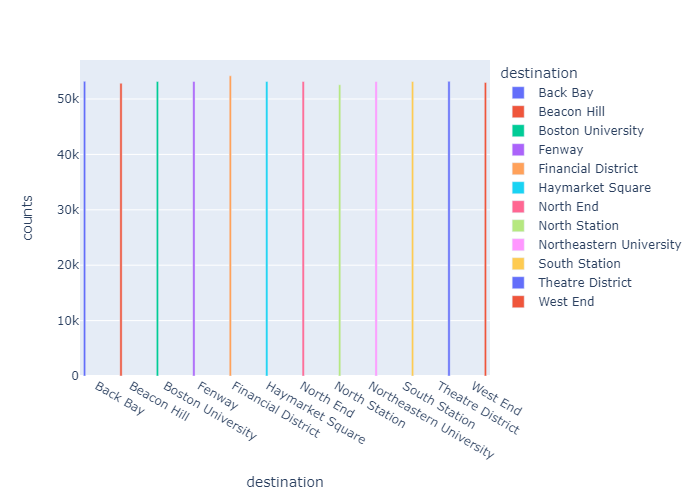

In [10]:
plot_bar('destination')

In [11]:
df_new.groupby(by=["source","destination"]).price.agg(["mean"])

mean
source   destination                       
Back Bay Boston University        14.039392
         Fenway                   13.658752
         Haymarket Square         17.987384
         North End                19.473019
         Northeastern University  13.151040
...                                     ...
West End Fenway                   17.932692
         Haymarket Square         12.771290
         North End                13.370017
         Northeastern University  18.964969
         South Station            15.018255

[72 rows x 1 columns]

In [12]:
import folium
from folium.plugins import FastMarkerCluster
df1 = df_new[df_new['source']=='Back Bay']
my_map = folium.Map(location=[df1["latitude"].mean(), df1["longitude"].mean()],zoom_start = 10)
my_map.add_child(FastMarkerCluster(df1[['latitude', 'longitude']].values.tolist(),color='green'))
my_map

In [13]:
df_new.columns

Index(['hour', 'day', 'month', 'source', 'destination', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'precipIntensity', 'precipProbability',
       'humidity', 'windSpeed', 'windGust', 'visibility', 'temperatureHigh',
       'temperatureLow', 'temperatureLowTime', 'apparentTemperatureHigh',
       'apparentTemperatureLow', 'icon', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'ozone', 'moonPhase', 'precipIntensityMax',
       'temperatureMin', 'temperatureMax', 'apparentTemperatureMin',
       'apparentTemperatureMax'],
      dtype='object')

In [14]:
drop_list = ['apparentTemperature', 'precipIntensity', 'precipProbability',
       'humidity', 'windSpeed', 'windGust', 'visibility', 'temperatureHigh',
       'temperatureLow', 'temperatureLowTime', 'apparentTemperatureHigh',
       'apparentTemperatureLow', 'icon', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'ozone', 'moonPhase', 'precipIntensityMax',
       'temperatureMin', 'temperatureMax', 'apparentTemperatureMin',
       'apparentTemperatureMax','name','hour', 'day', 'month', 'temperature', 'surge_multiplier']
df_new=df_new.drop(drop_list, axis=1)
df_new.head()

,source,destination,price,distance,latitude,longitude
0,Haymarket Square,North Station,5.0,0.44,42.2148,-71.033
1,Haymarket Square,North Station,11.0,0.44,42.2148,-71.033
2,Haymarket Square,North Station,7.0,0.44,42.2148,-71.033
3,Haymarket Square,North Station,26.0,0.44,42.2148,-71.033
4,Haymarket Square,North Station,9.0,0.44,42.2148,-71.033


In [15]:
df['source'].unique(), df['destination'].unique() 

(array(['Haymarket Square', 'Back Bay', 'North End', 'North Station',
        'Beacon Hill', 'Boston University', 'Fenway', 'South Station',
        'Theatre District', 'West End', 'Financial District',
        'Northeastern University'], dtype=object),
 array(['North Station', 'Northeastern University', 'West End',
        'Haymarket Square', 'South Station', 'Fenway', 'Theatre District',
        'Beacon Hill', 'Back Bay', 'North End', 'Financial District',
        'Boston University'], dtype=object))

In [16]:
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder,OneHotEncoder # Ordinal Encoding
## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [17]:
categorical_cols = df_new.select_dtypes(include='object').columns
numerical_cols = df_new.select_dtypes(exclude='object').columns

In [18]:
src_categories = ['Haymarket Square', 'Back Bay', 'North End', 'North Station',
        'Beacon Hill', 'Boston University', 'Fenway', 'South Station',
        'Theatre District', 'West End', 'Financial District',
        'Northeastern University']
dst_categories = ['North Station', 'Northeastern University', 'West End',
        'Haymarket Square', 'South Station', 'Fenway', 'Theatre District',
        'Beacon Hill', 'Back Bay', 'North End', 'Financial District',
        'Boston University']

In [19]:
## Numerical Pipeline
num_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
    ]

)

# Categorigal Pipeline
cat_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('labelencoder',OrdinalEncoder(categories=[src_categories,dst_categories])),
    ('scaler',StandardScaler())
    ]

)

preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,numerical_cols),
('cat_pipeline',cat_pipeline,categorical_cols)
])

In [20]:
X_scaled=pd.DataFrame(preprocessor.fit_transform(df_new),columns=preprocessor.get_feature_names_out())


In [21]:
X_scaled

,num_pipeline__price,num_pipeline__distance,num_pipeline__latitude,num_pipeline__longitude,cat_pipeline__source,cat_pipeline__destination
0,-1.238169,-1.540640,-2.577771,1.632431,-1.594418,-1.596871
1,-0.594693,-1.540640,-2.577771,1.632431,-1.594418,-1.596871
2,-1.023677,-1.540640,-2.577771,1.632431,-1.594418,-1.596871
3,1.013998,-1.540640,-2.577771,1.632431,-1.594418,-1.596871
4,-0.809185,-1.540640,-2.577771,1.632431,-1.594418,-1.596871
...,...,...,...,...,...,...
637971,-0.755562,-1.047427,0.287088,0.090822,1.010217,1.010194
637972,-0.380201,-1.047427,0.287088,0.090822,1.010217,1.010194
637973,-0.755562,-1.047427,0.287088,0.090822,1.010217,1.010194
637974,1.121244,-1.047427,0.287088,0.090822,1.010217,1.010194


In [22]:
k_means = KMeans(n_clusters=5,random_state=0,init='k-means++')
k_means.fit(X_scaled)
y_kmeans = k_means.fit_predict(X_scaled)
labels = k_means.labels_

In [23]:
len(labels)

637976

In [24]:
y_kmeans

array([2, 2, 2, ..., 0, 0, 0])

In [25]:
X_scaled['y_kmeans'] = y_kmeans

In [26]:
X_scaled

,num_pipeline__price,num_pipeline__distance,num_pipeline__latitude,num_pipeline__longitude,cat_pipeline__source,cat_pipeline__destination,y_kmeans
0,-1.238169,-1.540640,-2.577771,1.632431,-1.594418,-1.596871,2
1,-0.594693,-1.540640,-2.577771,1.632431,-1.594418,-1.596871,2
2,-1.023677,-1.540640,-2.577771,1.632431,-1.594418,-1.596871,2
3,1.013998,-1.540640,-2.577771,1.632431,-1.594418,-1.596871,2
4,-0.809185,-1.540640,-2.577771,1.632431,-1.594418,-1.596871,2
...,...,...,...,...,...,...,...
637971,-0.755562,-1.047427,0.287088,0.090822,1.010217,1.010194,0
637972,-0.380201,-1.047427,0.287088,0.090822,1.010217,1.010194,0
637973,-0.755562,-1.047427,0.287088,0.090822,1.010217,1.010194,0
637974,1.121244,-1.047427,0.287088,0.090822,1.010217,1.010194,0


In [27]:
X1 = X_scaled.drop(['num_pipeline__price'],axis=1)
y1 = X_scaled['num_pipeline__price']

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X1,y1,test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((446583, 6), (191393, 6), (446583,), (191393,))

In [29]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)


LinearRegression()

In [30]:
y_pred=lin_reg.predict(X_test)

In [31]:
r2_score(y_test,y_pred)

0.12150026688193305